In [25]:
import cv2
import warnings
import numpy as np
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as imd
warnings.filterwarnings('ignore')

In [39]:
face = face_recognition.load_image_file('images/Mukhram.jpg')
location = face_recognition.face_locations(face)

(-0.5, 791.5, 1066.5, -0.5)

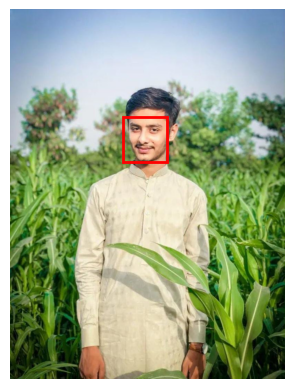

In [40]:
fig ,ax = plt.subplots()
ax.imshow(face)
for (top, right, bottom, left) in location:
    react = patches.Rectangle((left, top), right - left, bottom - top, edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(react)
ax.axis('off')

In [46]:
mukhram = face_recognition.load_image_file('images/Mukhram.jpg')
mukhram2 = face_recognition.load_image_file('images/mukhram1.jpg')
samranz = face_recognition.load_image_file('images/Samranz.jpg')


mukhram = face_recognition.face_encodings(mukhram)[0]
mukhram2 = face_recognition.face_encodings(mukhram2)[0]
samranz = face_recognition.face_encodings(samranz)[0]

compare = face_recognition.compare_faces([mukhram],mukhram2)
compare 

[True]

In [1]:
import os
import cv2
import face_recognition
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.image as imd

# List Directory 
fol = os.listdir('images')

# ALL Image Encodeing Data
def findEncodings(images):
    encodeList = []
    for img in images:
        path = 'images/'+img
        load_face = face_recognition.load_image_file(path)
        encode = face_recognition.face_encodings(load_face)[0]
        encodeList.append(encode)
    return encodeList

# Function Use 
data = findEncodings(fol)
# -------------------------------

# ALl Image Label Use
def label(data):
    label = []
    for i in data:
        label.append(data)
    return label
name = label(fol)
# -------------------------------


# Mark Attandance
def mark_attendance(name):
    now = datetime.now()
    dstring = now.strftime("%H:%M:%S %d/%m/%Y ")
    with open("Attendance.txt", "r") as file:
        lines = file.readlines()
        
    lines = [line for line in lines if not line.startswith(f"Name : {name}")]
    lines.append(f'Name : {name} Time : {dstring}\n')
    
    with open("Attendance.txt", "w") as file:
        file.writelines(lines)
#--------------------------------


# Make Video 
cap = cv2.VideoCapture(0)
face_cap = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, video = cap.read()
    if not ret:
        break
    col = cv2.cvtColor(video, cv2.COLOR_BGR2GRAY)
    FACES = face_cap.detectMultiScale(
        col,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(40, 40),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
    
    for (x, y, w, h) in FACES:
        face_roi = video[y:y+h, x:x+w]
        face_roi_rgb = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
        try:
            image_2_encoding = face_recognition.face_encodings(face_roi_rgb)[0]
            found_match = False
            for i in range(len(data)):
                results = face_recognition.compare_faces([data[i]], image_2_encoding)
                mark_name = name[0][i].split('.')[0]
                if results[0]:
                    cv2.putText(video, name[0][i].split('.')[0], (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)
                    cv2.rectangle(video, (x, y), (x+w, y+h), (0, 255, 0), 2)
                    found_match = True
                    mark_attendance(mark_name)
                    break
            if found_match==False:
                cv2.putText(video, 'No Match', (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
                cv2.rectangle(video, (x, y), (x+w, y+h), (0, 0, 255), 2)
                
        
        except IndexError:
            cv2.putText(video, 'Face not clear', (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 2)
    
    cv2.imshow('Video_Live', video)
    if cv2.waitKey(2) == 27:
        break

cap.release()
cv2.destroyAllWindows()